In [24]:
import matplotlib.pyplot as plt

In [201]:
chrom, pos = '22', 24380000

phase_dir = '../phased_ihart'
#family_sizes = [3, 4, 5, 6, 7]
family_sizes = [4, 5, 6, 7]

ssc_phase_dir = '../phased_ssc'

In [202]:
ped_files = ['../data/160826.ped', '../data/ssc.ped']
# Affection (0=unknown; 1=unaffected; 2=affected)
child_id_to_affected = dict()
child_id_to_sex = dict()

for ped_file in ped_files:
    with open(ped_file, 'r') as f:
        for line in f:
            pieces = line.strip().split('\t')
            if len(pieces) >= 6:
                fam_id, child_id, f_id, m_id, sex, disease_status = pieces[0:6]
                child_id_to_affected[child_id] = disease_status
                child_id_to_sex[child_id] = sex

In [203]:
family_to_individuals = dict()
parent_id_to_genotype = dict()
child_id_to_maternal_gen = dict()
child_id_to_paternal_gen = dict()

del_to_gen = {0: 1, 1:0, -1:3}

for j in family_sizes:
    with open('%s/chr.%s.familysize.%d.families.txt' % (phase_dir, chrom, j), 'r')  as f:
        next(f) # skip header
        for line in f:
            pieces = line.strip().split('\t')
            family_key = pieces[0]
            family_to_individuals[family_key] = pieces[1:(1+j)]

    # load deletions
    with open('%s/chr.%s.familysize.%d.phased.txt' % (phase_dir, chrom, j), 'r')  as f:
        next(f) # skip header

        for line in f:
            pieces = line.strip().split('\t')
            family_key = pieces[0]
            inds = family_to_individuals[family_key]
            
            inheritance_state = [int(x) for x in pieces[1:(2+(j*2))]]
            start_pos, end_pos = [int(x) for x in pieces[(2+(j*2)):(4+(j*2))]]
            
            if start_pos <= pos and pos <= end_pos:
                # this is our position of interest
                mom_gen = [del_to_gen[x] for x in inheritance_state[:2]]
                trans0 = len([i for i in range(4, 2*len(inds), 2) if inheritance_state[i]==0])
                trans1 = len([i for i in range(4, 2*len(inds), 2) if inheritance_state[i]==1])
                if trans0 == 0:
                    mom_gen[0] = 3
                elif trans1 == 0:
                    mom_gen[1] = 3
                parent_id_to_genotype[inds[0]] = tuple(mom_gen)
                
                dad_gen = [del_to_gen[x] for x in inheritance_state[2:4]]
                trans0 = len([i for i in range(5, 2*len(inds), 2) if inheritance_state[i]==0])
                trans1 = len([i for i in range(5, 2*len(inds), 2) if inheritance_state[i]==1])
                if trans0 == 0:
                    dad_gen[0] = 3
                elif trans1 == 0:
                    dad_gen[1] = 3
                parent_id_to_genotype[inds[1]] = tuple(dad_gen)
                
                for i, child in enumerate(inds[2:]):
                    mat_s, pat_s = inheritance_state[4+(2*i)], inheritance_state[5+(2*i)]
                    if mat_s == -1:
                        child_id_to_maternal_gen[child] = 4
                    else:
                        child_id_to_maternal_gen[child] = mom_gen[mat_s]
                    if pat_s == -1:
                        child_id_to_paternal_gen[child] = 4
                    else:
                        child_id_to_paternal_gen[child] = dad_gen[pat_s]
                    

In [204]:
j = 4
with open('%s/chr.%s.familysize.4.families.txt' % (ssc_phase_dir, chrom), 'r')  as f:
    next(f) # skip header
    for line in f:
        pieces = line.strip().split('\t')
        family_key = pieces[0]
        family_to_individuals[family_key] = pieces[1:(1+j)]

# load deletions
with open('%s/chr.%s.familysize.4.phased.txt' % (ssc_phase_dir, chrom), 'r')  as f:
    next(f) # skip header

    for line in f:
        pieces = line.strip().split('\t')
        family_key = pieces[0]
        inds = family_to_individuals[family_key]
            
        inheritance_state = [int(x) for x in pieces[1:(2+(j*2))]]
        start_pos, end_pos = [int(x) for x in pieces[(2+(j*2)):(4+(j*2))]]
            
        if start_pos <= pos and pos <= end_pos:
            # this is our position of interest
            mom_gen = [del_to_gen[x] for x in inheritance_state[:2]]
            trans0 = len([i for i in range(4, 2*len(inds), 2) if inheritance_state[i]==0])
            trans1 = len([i for i in range(4, 2*len(inds), 2) if inheritance_state[i]==1])
            if trans0 == 0:
                mom_gen[0] = 3
            elif trans1 == 0:
                mom_gen[1] = 3
            parent_id_to_genotype[inds[0]] = tuple(mom_gen)
                
            dad_gen = [del_to_gen[x] for x in inheritance_state[2:4]]
            trans0 = len([i for i in range(5, 2*len(inds), 2) if inheritance_state[i]==0])
            trans1 = len([i for i in range(5, 2*len(inds), 2) if inheritance_state[i]==1])
            if trans0 == 0:
                dad_gen[0] = 3
            elif trans1 == 0:
                dad_gen[1] = 3
            parent_id_to_genotype[inds[1]] = tuple(dad_gen)
                
            for i, child in enumerate(inds[2:]):
                mat_s, pat_s = inheritance_state[4+(2*i)], inheritance_state[5+(2*i)]
                if mat_s == -1:
                    child_id_to_maternal_gen[child] = 4
                else:
                    child_id_to_maternal_gen[child] = mom_gen[mat_s]
                if pat_s == -1:
                    child_id_to_paternal_gen[child] = 4
                else:
                    child_id_to_paternal_gen[child] = dad_gen[pat_s]

In [205]:
from collections import Counter
print(Counter(parent_id_to_genotype.values()))
print(Counter(child_id_to_maternal_gen.values()))
print(Counter(child_id_to_paternal_gen.values()))

Counter({(0, 0): 1385, (0, 3): 1184, (1, 0): 71, (0, 1): 66, (1, 3): 49})
Counter({0: 3079, 1: 147, 4: 22})
Counter({0: 3083, 1: 147, 4: 18})


In [206]:
sample_id_to_family_size = dict()
for inds in family_to_individuals.values():
    for ind in inds:
        sample_id_to_family_size[ind] = len(inds)

In [207]:
print(Counter(sample_id_to_family_size[k] for k in parent_id_to_genotype.keys()))

Counter({4: 1918, 5: 707, 6: 112, 7: 18})


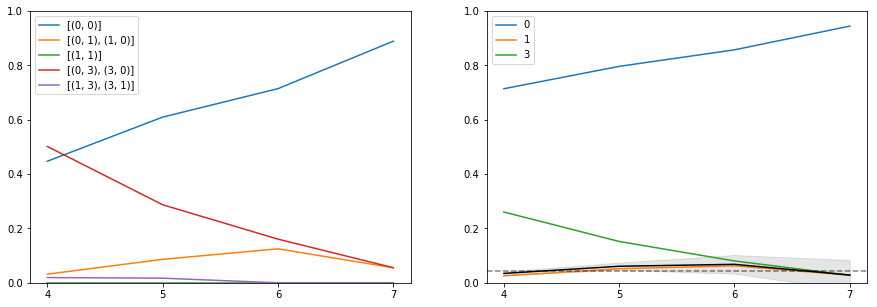

In [208]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
parent_norms = [len([x for p, x in parent_id_to_genotype.items() if sample_id_to_family_size[p] == famsize]) for famsize in family_sizes]
for k in [[(0, 0)], [(0, 1), (1, 0)], [(1, 1)], [(0, 3), (3, 0)], [(1, 3), (3, 1)]]:
    plt.plot([len([x for p, x in parent_id_to_genotype.items() if sample_id_to_family_size[p] == famsize and x in k])/parent_norms[i] for i, famsize in enumerate(family_sizes)],
            label=str(k))
    
plt.legend()
plt.xticks(range(len(family_sizes)), family_sizes)
plt.ylim([0, 1])

plt.subplot(1, 2, 2)
fs = []
for k in [0, 1, 3]:
    f = [sum([(x[0]==k)+(x[1]==k) for p, x in parent_id_to_genotype.items() if sample_id_to_family_size[p] == famsize]) for famsize in family_sizes] 
    plt.plot([x/(2*y) for x, y in zip(f, parent_norms)], label=str(k))
    fs.append(f)
f = [x/(x+y) for x, y in zip(fs[1], fs[0])]
e = [1.96*np.sqrt(x*(1-x)/(y+z)) for x, y, z in zip(f, fs[1], fs[0])]
plt.plot(f, color='black')
plt.fill_between(range(len(family_sizes)), 
                 [x-y for x, y in zip(f, e)], 
                 [x+y for x, y in zip(f, e)], color='black', alpha=0.1)
af = sum(fs[1])/(sum(fs[1])+sum(fs[0]))
plt.axhline(af, color='black', linestyle='--', alpha=0.5)    

#f = [x/(x+y+z) for x, y, z in zip(fs[2], fs[0], fs[1])]
#e = [1.96*np.sqrt(x*(1-x)/(y+z+a)) for x, y, z, a in zip(f, fs[2], fs[0], fs[1])]
#plt.plot(f, color='red')
#plt.fill_between(range(len(family_sizes)), 
#                 [x-y for x, y in zip(f, e)], 
#                 [x+y for x, y in zip(f, e)], color='red', alpha=0.1)
#

    
plt.legend()
plt.xticks(range(len(family_sizes)), family_sizes)
plt.ylim([0, 1])



plt.show()



In [209]:
print(af)

0.04348842646714987


In [210]:
aut_parvar, typ_parvar = 0, 0
aut_noparvar, typ_noparvar = 0, 0

for inds in family_to_individuals.values():
    mom, dad = inds[:2]
    momgen = parent_id_to_genotype[mom]
    dadgen = parent_id_to_genotype[dad]
    for child in inds[2:]:
        is_aff = child_id_to_affected[child] == '2'
                
        if is_aff:
            aut_noparvar += ((momgen[0]==0) + (momgen[1]==0) + (dadgen[0]==0) + (dadgen[1]==0))
            aut_parvar += ((momgen[0]==1) + (momgen[1]==1) +  (dadgen[0]==1) + (dadgen[1]==1))
        else:
            typ_noparvar += ((momgen[0]==0) + (momgen[1]==0) + (dadgen[0]==0) + (dadgen[1]==0))
            typ_parvar += ((momgen[0]==1) + (momgen[1]==1) +  (dadgen[0]==1) + (dadgen[1]==1))

print('autism af', aut_parvar/(aut_parvar+aut_noparvar))
print('typical af', typ_parvar/(typ_parvar+typ_noparvar))


autism af 0.04812254303917582
typical af 0.041810642709053214


In [211]:
import numpy as np

tdt_no_miss_trans = [0]*len(family_sizes)
tdt_no_miss_attempts = [0]*len(family_sizes)
tdt_no_miss_aff = [[0, 0], [0, 0]]
tdt_no_miss_sex = [[0, 0], [0, 0]]

tdt_miss_trans = [0]*len(family_sizes)
tdt_miss_attempts = [0]*len(family_sizes)
tdt_miss_aff = [[0, 0], [0, 0]]
tdt_miss_sex = [[0, 0], [0, 0]]

tdt_aug_trans = [0]*len(family_sizes)
tdt_aug_attempts = [0]*len(family_sizes)
tdt_aug_aff = [[0, 0], [0, 0]]
tdt_aug_sex = [[0, 0], [0, 0]]

tdt_no_miss_trio_weights = {
    (0, 1, 0): [1, 0], (0, 1, 1): [0, 1],
    (1, 0, 0): [1, 0], (1, 0, 1): [0, 1],
}

tdt_miss_trio_weights = {
    (0, 1, 0): [1, 0], (0, 1, 1): [0, 1],
    (1, 0, 0): [1, 0], (1, 0, 1): [0, 1],
    (1, 3, 1): [0, 1], (1, 3, 3): [1, 0],
    (3, 1, 1): [0, 1], (3, 1, 3): [1, 0]
}

tdt_aug_trio_weights = {
    (0, 1, 0): [1, 0], (0, 1, 1): [0, 1],
    (1, 0, 0): [1, 0], (1, 0, 1): [0, 1],
    (0, 3, 0): [af, 0], (0, 3, 3): [0, af],
    (3, 0, 0): [af, 0], (3, 0, 3): [0, af],
    (1, 3, 1): [0, 1-af], (1, 3, 3): [1-af, 0],
    (3, 1, 1): [0, 1-af], (3, 1, 3): [1-af, 0]
}

for i, famsize in enumerate(family_sizes):
    for inds in family_to_individuals.values():
        if len(inds) == famsize:
            mom, dad = inds[:2]
            
            momgen = parent_id_to_genotype[mom]
            dadgen = parent_id_to_genotype[dad]
            for child in inds[2:]:
                is_aff = child_id_to_affected[child] == '2'
                is_f = child_id_to_sex[child] == '2'
                
                # maternal transmissions
                trio = (momgen[0], momgen[1], child_id_to_maternal_gen[child])
                if trio in tdt_no_miss_trio_weights:
                    for w, is_trans in zip(tdt_no_miss_trio_weights[trio], [False, True]):
                        tdt_no_miss_attempts[i] += w
                        tdt_no_miss_aff[is_aff][is_trans] += w
                        tdt_no_miss_sex[is_f][is_trans] += w
                        if is_trans:
                            tdt_no_miss_trans[i] += w
                    
                if trio in tdt_miss_trio_weights:
                    for w, is_trans in zip(tdt_miss_trio_weights[trio], [False, True]):
                        tdt_miss_attempts[i] += w
                        tdt_miss_aff[is_aff][is_trans] += w
                        tdt_miss_sex[is_f][is_trans] += w
                        if is_trans:
                            tdt_miss_trans[i] += w
                            
                if trio in tdt_aug_trio_weights:
                    for w, is_trans in zip(tdt_aug_trio_weights[trio], [False, True]):
                        tdt_aug_attempts[i] += w
                        tdt_aug_aff[is_aff][is_trans] += w
                        tdt_aug_sex[is_f][is_trans] += w
                        if is_trans:
                            tdt_aug_trans[i] += w
                    
                # paternal transmissions  
                trio = (dadgen[0], dadgen[1], child_id_to_paternal_gen[child])
                if trio in tdt_no_miss_trio_weights:
                    for w, is_trans in zip(tdt_no_miss_trio_weights[trio], [False, True]):
                        tdt_no_miss_attempts[i] += w
                        tdt_no_miss_aff[is_aff][is_trans] += w
                        tdt_no_miss_sex[is_f][is_trans] += w
                        if is_trans:
                            tdt_no_miss_trans[i] += w

                if trio in tdt_miss_trio_weights:
                    for w, is_trans in zip(tdt_miss_trio_weights[trio], [False, True]):
                        tdt_miss_attempts[i] += w
                        tdt_miss_aff[is_aff][is_trans] += w
                        tdt_miss_sex[is_f][is_trans] += w
                        if is_trans:
                            tdt_miss_trans[i] += w
                            
                if trio in tdt_aug_trio_weights:
                    for w, is_trans in zip(tdt_aug_trio_weights[trio], [False, True]):
                        tdt_aug_attempts[i] += w
                        tdt_aug_aff[is_aff][is_trans] += w
                        tdt_aug_sex[is_f][is_trans] += w
                        if is_trans:
                            tdt_aug_trans[i] += w



print(tdt_no_miss_attempts)
print(tdt_miss_attempts)
print(tdt_aug_attempts)

[122, 183, 56, 5]
[196, 219, 56, 5]
[275.7577741407523, 243.2230535422023, 59.04418985270047, 5.217442132335748]


In [212]:
print(tdt_aug_attempts)
print(tdt_aug_trans)

[275.7577741407523, 243.2230535422023, 59.04418985270047, 5.217442132335748]
[131.78185644143093, 126.43441664718262, 29, 2]


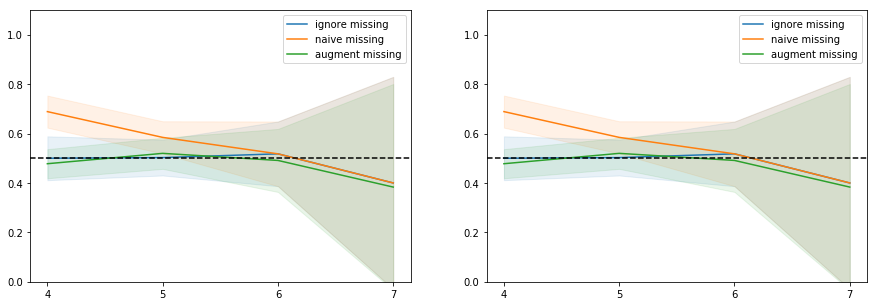

In [213]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
f = [np.inf if y == 0 else x/y for x, y in zip(tdt_no_miss_trans, tdt_no_miss_attempts)]
e = [np.inf if y == 0 else 1.96*np.sqrt(x*(1-x)/y) for x, y in zip(f, tdt_no_miss_attempts)]
p = plt.plot(f, label='ignore missing')
plt.fill_between(range(len(family_sizes)), 
                 [x-y for x, y in zip(f, e)], 
                 [x+y for x, y in zip(f, e)], color=p[0].get_color(), alpha=0.1)

f = [np.inf if y == 0 else x/y for x, y in zip(tdt_miss_trans, tdt_miss_attempts)]
e = [np.inf if y == 0 else 1.96*np.sqrt(x*(1-x)/y) for x, y in zip(f, tdt_miss_attempts)]
p = plt.plot(f, label='naive missing')
plt.fill_between(range(len(family_sizes)), 
                 [x-y for x, y in zip(f, e)], 
                 [x+y for x, y in zip(f, e)], color=p[0].get_color(), alpha=0.1)

f = [np.inf if y == 0 else x/y for x, y in zip(tdt_aug_trans, tdt_aug_attempts)]
e = [np.inf if y == 0 else 1.96*np.sqrt(x*(1-x)/y) for x, y in zip(f, tdt_aug_attempts)]
p = plt.plot(f, label='augment missing')
plt.fill_between(range(len(family_sizes)), 
                 [x-y for x, y in zip(f, e)], 
                 [x+y for x, y in zip(f, e)], color=p[0].get_color(), alpha=0.1)

plt.legend()
plt.xticks(range(len(family_sizes)), family_sizes)
plt.ylim([0, 1.1])
plt.axhline(0.5, color='black', linestyle='--')

plt.subplot(1, 2, 2)
f = [np.inf if y == 0 else x/y for x, y in zip(tdt_no_miss_trans, tdt_no_miss_attempts)]
e = [np.inf if y == 0 else 1.96*np.sqrt(x*(1-x)/y) for x, y in zip(f, tdt_no_miss_attempts)]
p = plt.plot(f, label='ignore missing')
plt.fill_between(range(len(family_sizes)), 
                 [x-y for x, y in zip(f, e)], 
                 [x+y for x, y in zip(f, e)], color=p[0].get_color(), alpha=0.1)

f = [np.inf if y == 0 else x/y for x, y in zip(tdt_miss_trans, tdt_miss_attempts)]
e = [np.inf if y == 0 else 1.96*np.sqrt(x*(1-x)/y) for x, y in zip(f, tdt_miss_attempts)]
p = plt.plot(f, label='naive missing')
plt.fill_between(range(len(family_sizes)), 
                 [x-y for x, y in zip(f, e)], 
                 [x+y for x, y in zip(f, e)], color=p[0].get_color(), alpha=0.1)

f = [np.inf if y == 0 else x/y for x, y in zip(tdt_aug_trans, tdt_aug_attempts)]
e = [np.inf if y == 0 else 1.96*np.sqrt(x*(1-x)/y) for x, y in zip(f, tdt_aug_attempts)]
p = plt.plot(f, label='augment missing')
plt.fill_between(range(len(family_sizes)), 
                 [x-y for x, y in zip(f, e)], 
                 [x+y for x, y in zip(f, e)], color=p[0].get_color(), alpha=0.1)

plt.legend()
plt.xticks(range(len(family_sizes)), family_sizes)
plt.ylim([0, 1.1])
plt.axhline(0.5, color='black', linestyle='--')

plt.show()

In [214]:
import scipy.stats

print('no miss, aff', scipy.stats.chi2_contingency(tdt_no_miss_aff)[1])
print('miss, aff', scipy.stats.chi2_contingency(tdt_miss_aff)[1])
print('aug, aff', scipy.stats.chi2_contingency(tdt_aug_aff)[1])

print()
print('no miss, sex', scipy.stats.chi2_contingency(tdt_no_miss_sex)[1])
print('miss, sex', scipy.stats.chi2_contingency(tdt_miss_sex)[1])
print('aug, sex', scipy.stats.chi2_contingency(tdt_aug_sex)[1])


no miss, aff 0.00107254006434
miss, aff 0.000966034149322
aug, aff 0.00171134751182

no miss, sex 0.458024548429
miss, sex 0.260742203014
aug, sex 0.673041542076
